In [319]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

In [320]:
def draw_heatmap(dataframe: pd.DataFrame) -> None:
    plt.figure(figsize=(10, 10))
    sns.heatmap(
        dataframe.corr(),
        xticklabels=dataframe.corr().columns,
        yticklabels=dataframe.corr().columns,
        annot=True,
    )

In [321]:
df = pd.read_csv("spaceship_titanic.csv")
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [322]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [323]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [324]:
cat_columns = ["HomePlanet", "Cabin", "Destination"]

In [325]:
for column_name in cat_columns:
    frequent_pl = df[column_name].value_counts().head(1).index[0]
    df[column_name].fillna(frequent_pl, inplace=True)

In [326]:
for name in [
    "Age",
    "CryoSleep",
    "VIP",
    "RoomService",
    "FoodCourt",
    "ShoppingMall",
    "Spa",
    "VRDeck",
]:
    df[name].fillna(df[name].median(), inplace=True)

In [327]:
df.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [328]:
hashmap_cat = {}
for col in cat_columns:
    for i, val in enumerate(pd.unique(df[col])):
        hashmap_cat[val] = i

# print(hashmap_cat)

for col in cat_columns:
    for val in pd.unique(df[col]):
        df[col].replace(val, hashmap_cat[val], inplace=True)

## Нахождение родственников

In [329]:
id_name_df = df[["PassengerId", "Name"]]
id_name_df

,PassengerId,Name
0,0001_01,Maham Ofracculy
1,0002_01,Juanna Vines
2,0003_01,Altark Susent
3,0003_02,Solam Susent
4,0004_01,Willy Santantines
...,...,...
8688,9276_01,Gravior Noxnuther
8689,9278_01,Kurta Mondalley
8690,9279_01,Fayey Connon
8691,9280_01,Celeon Hontichre


In [330]:
id_name_df['Name'].fillna('404 404', inplace=True)  # Да, костыль. Да, нужно было бы проходиться по каждой строке. Но оно работает в рамках поставленной задачи!
id_name_df['Name'] = id_name_df['Name'].astype(str)
id_name_df

,PassengerId,Name
0,0001_01,Maham Ofracculy
1,0002_01,Juanna Vines
2,0003_01,Altark Susent
3,0003_02,Solam Susent
4,0004_01,Willy Santantines
...,...,...
8688,9276_01,Gravior Noxnuther
8689,9278_01,Kurta Mondalley
8690,9279_01,Fayey Connon
8691,9280_01,Celeon Hontichre


In [331]:
from numpy import nan

In [332]:
id_name_df['PassengerId'] = id_name_df['PassengerId'].map(lambda x: x.split("_")[0])
id_name_df['Name'] = id_name_df['Name'].map(lambda x: x.split(" ")[1])
id_name_df['Name'].replace('404', nan, inplace=True)
id_name_df

,PassengerId,Name
0,0001,Ofracculy
1,0002,Vines
2,0003,Susent
3,0003,Susent
4,0004,Santantines
...,...,...
8688,9276,Noxnuther
8689,9278,Mondalley
8690,9279,Connon
8691,9280,Hontichre


In [333]:
ppd = id_name_df.groupby(by=["Name"], dropna=False)['Name'].transform('count')
# ppd = ppd.replace(id_name_df.iloc[nan], 0, inplace=True)

# ['Name'].transform('size')
# ppd.replace(id_name_df.iloc[nan], 0, inplace=True)
ppd
ppd.sort_values(ascending=False)

6968    18
7609    18
7605    18
7608    18
7607    18
        ..
7211     0
7317     0
1959     0
8664     0
27       0
Name: Name, Length: 8693, dtype: int64

In [334]:
df['Count_family'] = ppd
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Count_family
0,0001_01,0,False,0,0,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1
1,0002_01,1,False,1,0,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,4
2,0003_01,0,False,2,0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,6
3,0003_02,0,False,2,0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,6
4,0004_01,1,False,3,0,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,False,6556,2,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,3
8689,9278_01,1,True,6557,1,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,2
8690,9279_01,1,False,6558,0,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,6
8691,9280_01,0,False,6559,2,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,6


## Отсекание лишнего

<Axes: >

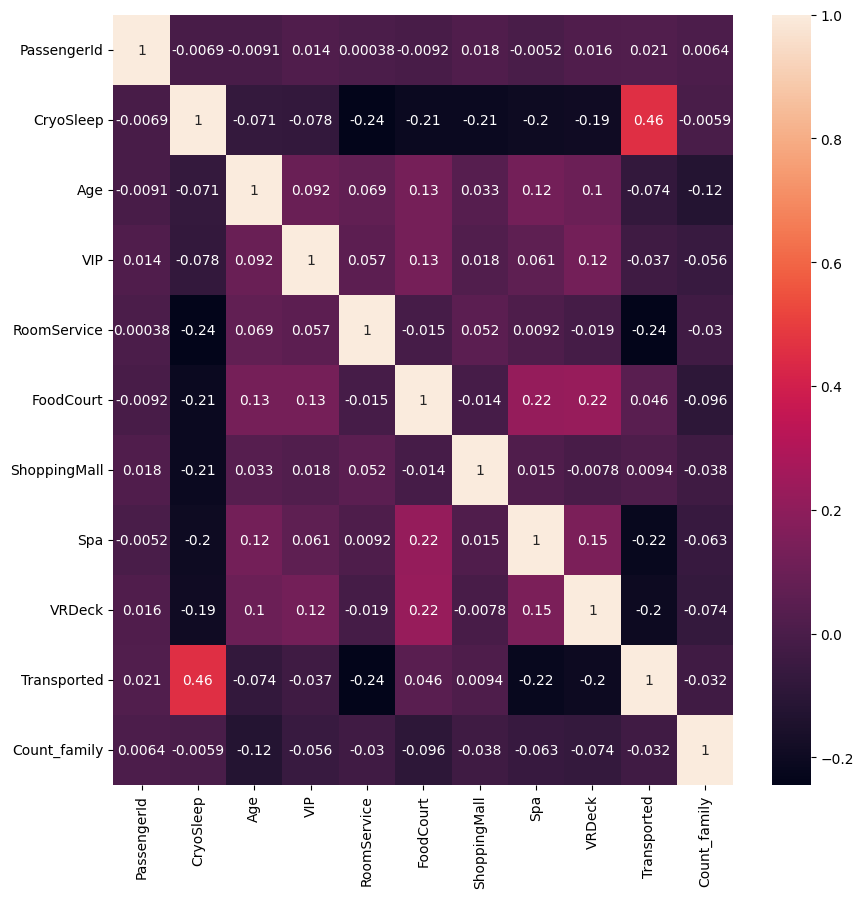

In [335]:
sdf = df.drop(columns=["Name"] + cat_columns, axis=1)
plt.figure(figsize=(10, 10))
sns.heatmap(
    sdf.corr(),
    xticklabels=sdf.corr().columns,
    yticklabels=sdf.corr().columns,
    annot=True,
)

## Дальнейшая обработка

In [336]:
sdf.drop(
    columns=["PassengerId", "ShoppingMall", "FoodCourt", "Age", "VIP", 'Count_family'], inplace=True
)
sdf

,CryoSleep,RoomService,Spa,VRDeck,Transported
0,False,0.0,0.0,0.0,False
1,False,109.0,549.0,44.0,True
2,False,43.0,6715.0,49.0,False
3,False,0.0,3329.0,193.0,False
4,False,303.0,565.0,2.0,True
...,...,...,...,...,...
8688,False,0.0,1643.0,74.0,False
8689,True,0.0,0.0,0.0,False
8690,False,0.0,1.0,0.0,True
8691,False,0.0,353.0,3235.0,False


<Axes: >

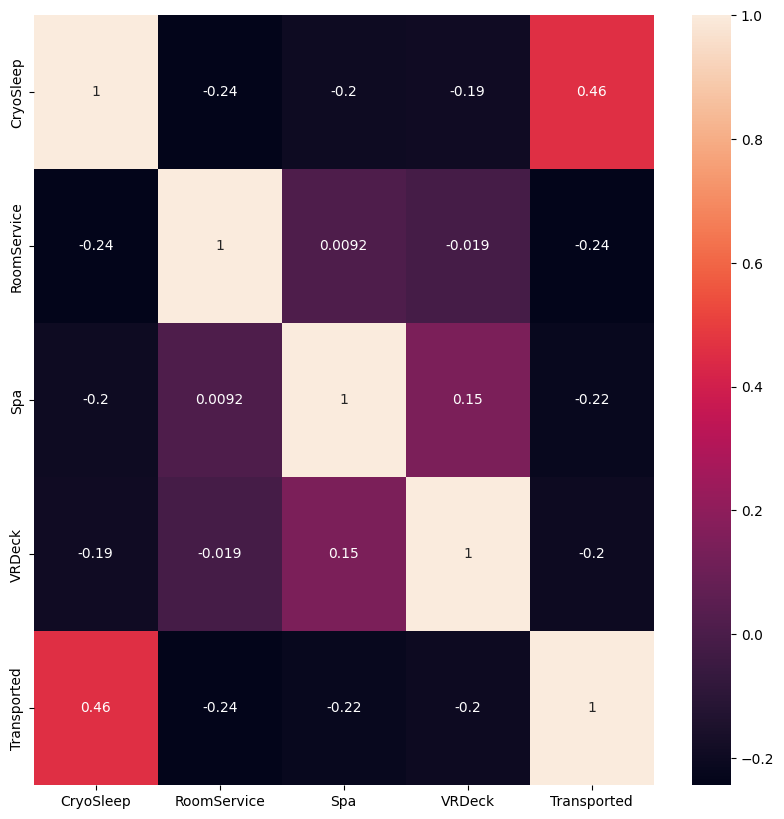

In [337]:
plt.figure(figsize=(10, 10))
sns.heatmap(
    sdf.corr(),
    xticklabels=sdf.corr().columns,
    yticklabels=sdf.corr().columns,
    annot=True,
)

## Отделение целевой функции

In [338]:
split_sdf = sdf.drop(columns=["Transported"])
split_sdf

,CryoSleep,RoomService,Spa,VRDeck
0,False,0.0,0.0,0.0
1,False,109.0,549.0,44.0
2,False,43.0,6715.0,49.0
3,False,0.0,3329.0,193.0
4,False,303.0,565.0,2.0
...,...,...,...,...
8688,False,0.0,1643.0,74.0
8689,True,0.0,0.0,0.0
8690,False,0.0,1.0,0.0
8691,False,0.0,353.0,3235.0


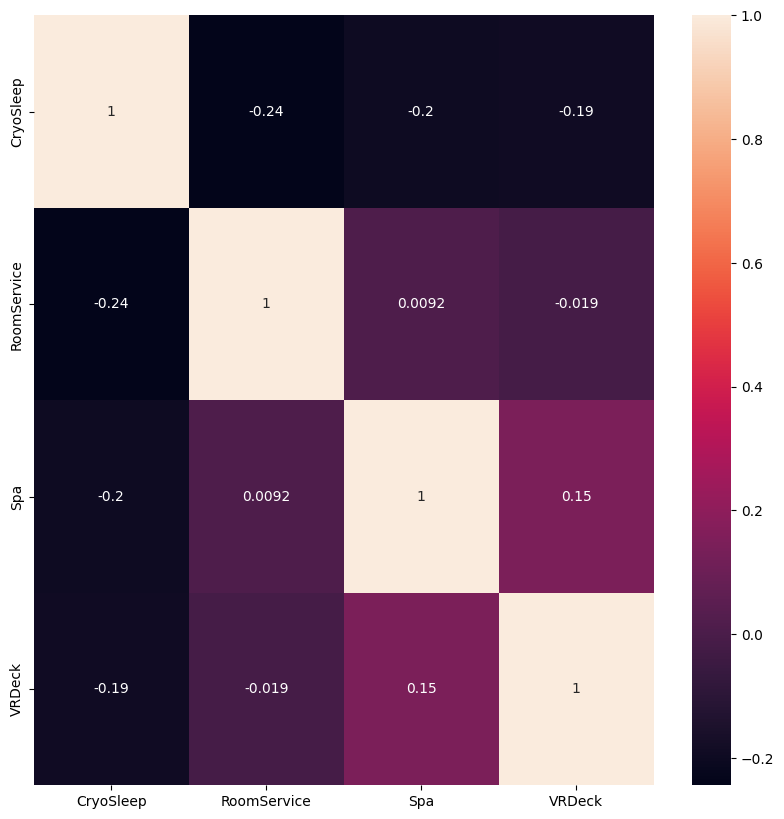

In [339]:
draw_heatmap(split_sdf)

## Нормализация

In [340]:
for f in sdf.columns:
    misdf = min(sdf[f])
    masdf = max(sdf[f])
    sdf[f] = sdf[f].map(lambda x: (x - misdf) / (masdf - misdf))

sdf

,CryoSleep,RoomService,Spa,VRDeck,Transported
0,0.0,0.000000,0.000000,0.000000,0.0
1,0.0,0.007608,0.024500,0.001823,1.0
2,0.0,0.003001,0.299670,0.002030,0.0
3,0.0,0.000000,0.148563,0.007997,0.0
4,0.0,0.021149,0.025214,0.000083,1.0
...,...,...,...,...,...
8688,0.0,0.000000,0.073322,0.003066,0.0
8689,1.0,0.000000,0.000000,0.000000,0.0
8690,0.0,0.000000,0.000045,0.000000,1.0
8691,0.0,0.000000,0.015753,0.134049,0.0


# Обучение моделей

In [341]:
from sklearn.model_selection import train_test_split as tts

df_train, df_test = tts(sdf, train_size=0.7, random_state=42)
df_train

,CryoSleep,RoomService,Spa,VRDeck,Transported
3032,0.0,0.000000,0.003793,0.006216,1.0
7757,1.0,0.000000,0.000000,0.000000,1.0
1795,0.0,0.000558,0.000223,0.003729,0.0
1702,0.0,0.000000,0.000089,0.001243,0.0
6634,0.0,0.000000,0.000000,0.001699,0.0
...,...,...,...,...,...
5734,0.0,0.000977,0.027222,0.000000,1.0
5191,0.0,0.048161,0.034006,0.017735,0.0
5390,0.0,0.011028,0.000000,0.001077,0.0
860,0.0,0.026454,0.000000,0.000000,0.0


In [363]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import xgboost as xgb

1. **accuracy_score** - это метрика, которая показывает долю правильно классифицированных образцов в обучающем наборе данных. Она вычисляется как отношение количества правильно классифицированных образцов к общему количеству образцов.

2. **precision_score** - это метрика, которая показывает, насколько точны положительные прогнозы модели. Она вычисляется как отношение истинно положительных прогнозов к сумме истинно положительных и ложно положительных прогнозов.

3. **recall_score** - это метрика, которая показывает, насколько хорошо модель обнаруживает положительные образцы. Она вычисляется как отношение истинно положительных прогнозов к сумме истинно положительных и ложно отрицательных прогнозов.

4. **f1_score** - это метрика, которая является гармоническим средним между точностью и полнотой. Она используется, когда важно учесть обе метрики одновременно.

5. **confusion_matrix** - это матрица, которая показывает количество истинно положительных, ложно положительных, истинно отрицательных и ложно отрицательных прогнозов модели. Она используется для более детального анализа ошибок модели.

In [366]:
def get_score(y_true, y_pred):
    return accuracy_score(y_true, y_pred), precision_score(y_true, y_pred), recall_score(y_true, y_pred), f1_score(y_true, y_pred), confusion_matrix(y_true, y_pred)

## До убирания выбросов

### Тренировка моделей

#### RandomForest

In [343]:
rfc = RandomForestClassifier()
rfc.fit(df_train.drop(columns=['Transported']), df_train['Transported'])

RandomForestClassifier()

In [369]:
rfc_result = rfc.predict(df_test.drop(columns=['Transported']))
rfc_result

array([0., 1., 1., ..., 0., 1., 1.])

In [370]:
rfc.score(df_test.drop(columns=['Transported']), df_test['Transported']), get_score(df_test['Transported'], rfc_result)

(0.7503834355828221,
 (0.7503834355828221,
  np.float64(0.7177314211212517),
  np.float64(0.8347232752084913),
  np.float64(0.7718191377497371),
  array([[ 856,  433],
         [ 218, 1101]])))

#### XGBoost

In [371]:
xgbc = xgb.XGBClassifier()
xgbc.fit(df_train.drop(columns=['Transported']), df_train['Transported'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [375]:
xgbc_result = xgbc.predict(df_test.drop(columns=['Transported']))
xgbc_result

array([0, 1, 1, ..., 0, 1, 1])

In [376]:
xgbc.score(df_test.drop(columns=['Transported']), df_test['Transported']), get_score(df_test['Transported'], xgbc_result)

(0.7615030674846626,
 (0.7615030674846626,
  np.float64(0.7258587167854829),
  np.float64(0.849128127369219),
  np.float64(0.782669461914745),
  array([[ 866,  423],
         [ 199, 1120]])))